# Problem 3 (visualization of the lost function ):
- Use the first & second architecture and the optimization routine you were assigned in Problem 1 to assess the loss function by interpolation, namely the path traveled through the loss function from the starting point to the optimal point obtained by the optimizer (extension of example interpolation 1.ipynb)

# Import

In [1]:
import tensorflow.compat.v1 as tf
import time
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.disable_v2_behavior()

#load MNIST dataset 
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


# Parameters

In [2]:
#Network Architecture
# -----------------------------------------
# Five hidden layers
# ------------------------------------------
# number of neurons in layer 1
n_hidden_1 = 50
# number of neurons in layer 2
n_hidden_2 = 50
# number of neurons in layer 3
n_hidden_3 = 50
# number of neurons in layer 4
n_hidden_4 = 50
# number of neurons in layer 5
n_hidden_5 = 50

#MNIST data image of shape 28*28=784
input_size = 784

# 0-9 digits recognition (labels)
output_size = 10

#change it to your own path 
#log_files_path = './checkpoints/'
log_files_path = 'D:/JupyterNotebook/IEOR_4742/HW2/Problem3/logs/'

# Definition of the Layer Function

In [3]:
def layer(x, weight_shape, bias_shape):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
    output:
        - output vector of the layer after the matrix multiplication and non linear transformation
    """
    print('inside layer')
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    
    #initialization of the weights
    w_0 = tf.random_normal_initializer(stddev=w_std)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    # different activation functions
    # you can try either 

    #return tf.nn.relu(tf.matmul(x, W) + b)
    return tf.matmul(x, W) + b

# Define Inference Function

In [4]:
def inference(x):
    """
    define the whole network (5 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """

    #tf.variable_scope可以让变量有相同的命名，包括tf.get_variable得到的变量，还有tf.Variable得到的变量
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])

    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        #print([n_hidden_2, n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        #print([n_hidden_3, n_hidden_4])

    with tf.variable_scope("hidden_layer_5"):
        hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
        #print([n_hidden_4, n_hidden_5])
     
    with tf.variable_scope("output"):
        output = layer(hidden_5, [n_hidden_5, output_size], [output_size])
        #print([n_hidden_5, output_size])

    return output

# Define Loss Function

In [5]:
def loss(output, y):
    """
    Computes softmax cross entropy between logits and labels and then the loss 
    
    intput:
        - output: the output of the inference function 
        - y: true value of the sample batch
        
        the two have the same shape (batch_size * num_of_classes)
    output:
        - loss: loss of the corresponding batch (scalar tensor)
    
    """
    #Computes softmax cross entropy between logits and labels.
    xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)

    return loss

# Main 

inside layer
inside layer
inside layer
inside layer
inside layer
inside layer
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

INFO:tensorflow:Restoring parameters from D:/JupyterNotebook/IEOR_4742/HW2/Problem3/logs/multi_layer/model-checkpoint-89100
inside layer
inside layer
inside layer
inside layer
inside layer
inside layer
[5983.528, 3.570539]


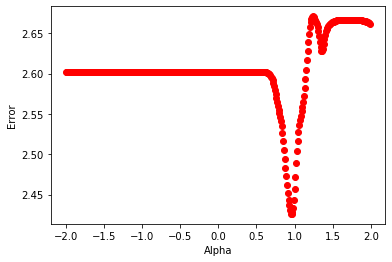

In [6]:
            
#the input variables are first define as placeholder 
# a placeholder is a variable/data which will be assigned later 
# image vector & label
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

#defines a session
sess = tf.Session()


with tf.variable_scope("multi_layer", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_opt = inference(x)
    
    #compute the cost 
    cost_opt = loss(output_opt, y)
    
    saver = tf.train.Saver() 
    
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                     "hidden_layer_2/W", "hidden_layer_2/b", 
                     "hidden_layer_3/W", "hidden_layer_3/b",
                     "hidden_layer_4/W", "hidden_layer_4/b",
                     "hidden_layer_5/W", "hidden_layer_5/b",
                     "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    
    #restore values of parameters saved previously
    #remember to download the model checkpoints files from canvas and save them in the corresponding path
    saver.restore(sess, log_files_path + 'multi_layer/model-checkpoint-89100')


with tf.variable_scope("multi_layer_init", reuse=tf.AUTO_REUSE):
    #rand neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_rand = inference(x)
    #compute the rand cost
    cost_rand = loss(output_rand, y)
    
    var_list_rand = ["hidden_layer_1/W", "hidden_layer_1/b",
                     "hidden_layer_2/W", "hidden_layer_2/b", 
                     "hidden_layer_3/W", "hidden_layer_3/b",
                     "hidden_layer_4/W", "hidden_layer_4/b",
                     "hidden_layer_5/W", "hidden_layer_5/b",
                     "output/W", "output/b"]
    
    var_list_rand = [tf.get_variable(v) for v in var_list_rand]
    
    #initialization of the variables
    init_op = tf.variables_initializer(var_list_rand)
    
    sess.run(init_op)

    

#dictionary for the test dataset 
#used to evaluate accuracy 
feed_dict = {
        x: mnist.test.images,
        y: mnist.test.labels,
}

#compute the loss for opt and rand networks
print(sess.run([cost_opt, cost_rand], feed_dict=feed_dict))

with tf.variable_scope("multi_layer_inter") as scope:
    #initialize the placeholder alpha coefficient 
    #a placeholder is a variable/data which will be assigned later 
    alpha = tf.placeholder("float", [1, 1])
    
    #the coefficients of the opt and rand networks are modulated with the alpha coefficient
    h1_W_inter = var_list_opt[0] * (1.0 - alpha) + var_list_rand[0] * (alpha)
    h1_b_inter = var_list_opt[1] * (1.0 - alpha) + var_list_rand[1] * (alpha)
    #
    h2_W_inter = var_list_opt[2] * (1.0 - alpha) + var_list_rand[2] * (alpha)
    h2_b_inter = var_list_opt[3] * (1.0 - alpha) + var_list_rand[3] * (alpha)
    #
    h3_W_inter = var_list_opt[4] * (1.0 - alpha) + var_list_rand[4] * (alpha)
    h3_b_inter = var_list_opt[5] * (1.0 - alpha) + var_list_rand[5] * (alpha)
    #
    h4_W_inter = var_list_opt[6] * (1.0 - alpha) + var_list_rand[6] * (alpha)
    h4_b_inter = var_list_opt[7] * (1.0 - alpha) + var_list_rand[7] * (alpha)
    #
    h5_W_inter = var_list_opt[8] * (1.0 - alpha) + var_list_rand[8] * (alpha)
    h5_b_inter = var_list_opt[9] * (1.0 - alpha) + var_list_rand[9] * (alpha)
    #
    o_W_inter  = var_list_opt[10] * (1.0 - alpha) + var_list_rand[10] * (alpha)
    o_b_inter  = var_list_opt[11] * (1.0 - alpha) + var_list_rand[11] * (alpha)
    
    h1_inter = tf.nn.sigmoid(tf.matmul(x,        h1_W_inter) + h1_b_inter)
    h2_inter = tf.nn.tanh(tf.matmul(h1_inter, h2_W_inter) + h2_b_inter)
    h3_inter = tf.nn.relu(tf.matmul(h2_inter, h3_W_inter) + h3_b_inter)
    h4_inter = tf.nn.sigmoid(tf.matmul(h3_inter, h4_W_inter) + h4_b_inter)
    h5_inter = tf.nn.leaky_relu(tf.matmul(h4_inter, h5_W_inter) + h5_b_inter)
    o_inter  = tf.nn.tanh(tf.matmul(h5_inter, o_W_inter ) + o_b_inter)
    
    cost_inter = loss(o_inter, y)
    tf.summary.scalar("interpolated_cost", cost_inter)
       
#save the parameters for plotting in tensorboard
summary_writer = tf.summary.FileWriter(log_files_path + 'linear_interpolation_1/', sess.graph)
summary_op = tf.summary.merge_all()

#list to save the results of the following for loop
results = []
alphaMin = -2
alphaMax = 2
alphaStep = 0.01
for a in np.arange(alphaMin, alphaMax, alphaStep):
    #test data with different values of alpha coefficient
    feed_dict = {
            x: mnist.test.images,
            y: mnist.test.labels,
            alpha: [[a]],
            }
    #compute the loss for the different value of alpha
    [cost, summary_str] = sess.run([cost_inter, summary_op], feed_dict=feed_dict)
    summary_writer.add_summary(summary_str, (a + alphaMax)/alphaStep)
    results.append(cost)

plt.plot(np.arange(alphaMin, alphaMax, alphaStep), results, 'ro')
plt.ylabel('Error')
plt.xlabel('Alpha')
plt.show()